# Data Scientist Take-Home Challenge

In [1]:
__name__ = "Data_Science_Challenge"
__version__ = 1.0
__author__ = "José Roberto Torres Bello"
__email__ = "rtorres.bello@hotmail.com"
__description__ = "Data Science Challenge"
__date__ = 21-4-2022

## Librerías

In [2]:
# Importando las librerías que se van a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns
import sys
import platform
import glob
import os

In [3]:
# Versiones de las librerías
print("Python version:", sys.version)
print("Numpy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Seaborn version:", sns.__version__)
print("Sistema:", platform.platform())

Python version: 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
Numpy version: 1.20.1
Pandas version: 1.2.4
Seaborn version: 0.11.1
Sistema: Windows-10-10.0.19041-SP0


In [4]:
# Muestra csv files
files = glob.glob('*.csv')
files

['genome_scores.csv',
 'genome_tags.csv',
 'link.csv',
 'movie.csv',
 'rating.csv',
 'tag.csv']

### Datasets tomados de:
https://www.kaggle.com/datasets/grouplens/movielens-20m-dataset

Se puedo haber usado el API de kaggle para descargar directamente los datos usando el token y el comando:

**kaggle datasets download -d grouplens/movielens-20m-dataset**

In [5]:
# Número de files y de columnas de los datasets
print(files[0])
genome_scores =  pd.read_csv('genome_scores.csv', sep=",")
print(f'{genome_scores.shape[0]} filas \n{genome_scores.shape[1]} columnas \n') 

print(files[1])
genome_tags =  pd.read_csv('genome_tags.csv', sep=",")
print(f'{genome_tags.shape[0]} filas \n{genome_tags.shape[1]} columnas \n') 

print(files[2])
link =  pd.read_csv('link.csv', sep=",")
print(f'{link.shape[0]} filas \n{link.shape[1]} columnas \n') 

print(files[3])
movie =  pd.read_csv('movie.csv', sep=",")
print(f'{movie.shape[0]} filas \n{movie.shape[1]} columnas \n') 

print(files[4])
rating =  pd.read_csv('rating.csv', sep=",")
print(f'{rating.shape[0]} filas \n{rating.shape[1]} columnas \n') 

print(files[5])
tag =  pd.read_csv('tag.csv', sep=",")
print(f'{tag.shape[0]} filas \n{tag.shape[1]} columnas') 

genome_scores.csv
11709768 filas 
3 columnas 

genome_tags.csv
1128 filas 
2 columnas 

link.csv
27278 filas 
3 columnas 

movie.csv
27278 filas 
3 columnas 

rating.csv
20000263 filas 
4 columnas 

tag.csv
465564 filas 
4 columnas


In [6]:
# Se hace un merge de los datasets rating y movie por movieId, se muestran los primeros 5 registros
df1 = pd.merge(rating, movie, how='left')

In [7]:
df1.head()

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,2005-04-02 23:53:47,Jumanji (1995),Adventure|Children|Fantasy
1,1,29,3.5,2005-04-02 23:31:16,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
2,1,32,3.5,2005-04-02 23:33:39,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,3.5,2005-04-02 23:32:07,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,3.5,2005-04-02 23:29:40,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [8]:
# Se ordena por movieId
df1 = df1.sort_values('movieId')

In [9]:
df1.head()

,userId,movieId,rating,timestamp,title,genres
14162882,97809,1,3.0,2008-06-11 04:47:11,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
15347420,106140,1,5.0,2013-01-29 03:33:49,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
15347355,106138,1,3.0,2002-07-31 15:48:53,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
10170195,70354,1,4.5,2011-02-13 18:55:40,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
10170255,70355,1,3.5,2008-01-26 16:56:54,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [10]:
# Se sistutye | por un espacio
df1['genres'] = df1['genres'].str.replace('|', ' ')

<ipython-input-10-e263338a1d42>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df1['genres'] = df1['genres'].str.replace('|', ' ')


In [11]:
df1.head()

,userId,movieId,rating,timestamp,title,genres
14162882,97809,1,3.0,2008-06-11 04:47:11,Toy Story (1995),Adventure Animation Children Comedy Fantasy
15347420,106140,1,5.0,2013-01-29 03:33:49,Toy Story (1995),Adventure Animation Children Comedy Fantasy
15347355,106138,1,3.0,2002-07-31 15:48:53,Toy Story (1995),Adventure Animation Children Comedy Fantasy
10170195,70354,1,4.5,2011-02-13 18:55:40,Toy Story (1995),Adventure Animation Children Comedy Fantasy
10170255,70355,1,3.5,2008-01-26 16:56:54,Toy Story (1995),Adventure Animation Children Comedy Fantasy


## Valores nulos

In [12]:
# Tipo de datos del merged dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000263 entries, 14162882 to 19227262
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  object 
 4   title      object 
 5   genres     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.0+ GB


Se tienen tres variables numéricas donde dos son enteros y una flotante, también se tienen tres variables de tipo object.

In [13]:
# Total de nulos en bruto y porcentaje
total = df1.isnull().sum()
pctg = df1.isnull().sum() / df1.isnull().count()*100
missing_data = pd.concat([total, pctg], axis = 1, keys = ['total', 'pctg'])
missing_data[missing_data['total']>0]

,total,pctg


No hay datos nulos

## Distribución de Frecuencias de las películas

Pulp Fiction (1994)                                      67310
Forrest Gump (1994)                                      66172
Shawshank Redemption, The (1994)                         63366
Silence of the Lambs, The (1991)                         63299
Jurassic Park (1993)                                     59715
Star Wars: Episode IV - A New Hope (1977)                54502
Braveheart (1995)                                        53769
Terminator 2: Judgment Day (1991)                        52244
Matrix, The (1999)                                       51334
Schindler's List (1993)                                  50054
Toy Story (1995)                                         49695
Fugitive, The (1993)                                     49581
Apollo 13 (1995)                                         47777
Independence Day (a.k.a. ID4) (1996)                     47048
Usual Suspects, The (1995)                               47006
Star Wars: Episode VI - Return of the Jedi (1983)      

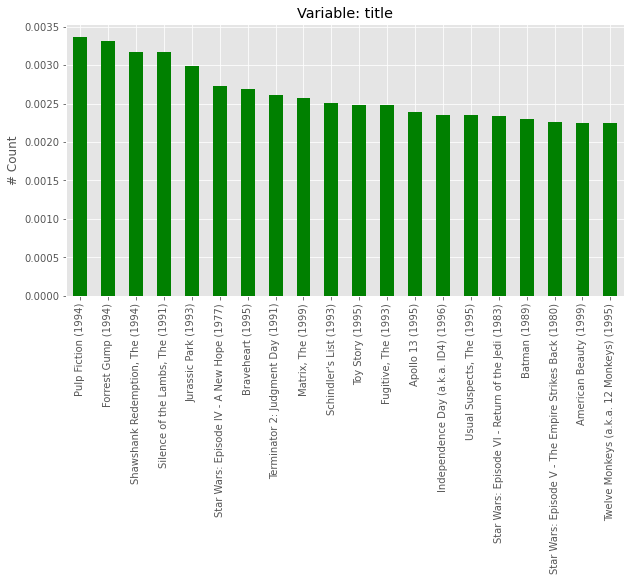

In [14]:
print(df1['title'].value_counts()[0:20])
df1['title'].value_counts(normalize=True)[0:20].plot(kind='bar', color='green', figsize=(10,5))
plt.title("Variable: title")
plt.ylabel("# Count")
plt.show()

La película más vista fue **Pulp Fiction (1994)** seguida de **Forrest Gump (1994)**.

## Distribución de Frecuencias de los géneros

Drama                               1467402
Comedy                              1316161
Comedy Romance                       793252
Comedy Drama                         656474
Drama Romance                        644626
Comedy Drama Romance                 615897
Crime Drama                          467417
Action Adventure Sci-Fi              441351
Action Adventure Thriller            313902
Action Crime Thriller                310685
Drama Thriller                       292533
Action Adventure Sci-Fi Thriller     291796
Drama War                            239542
Action Sci-Fi Thriller               232931
Crime Drama Thriller                 217121
Comedy Crime                         217032
Action Drama War                     213007
Action Crime Drama Thriller          195241
Documentary                          173848
Thriller                             152139
Name: genres, dtype: int64


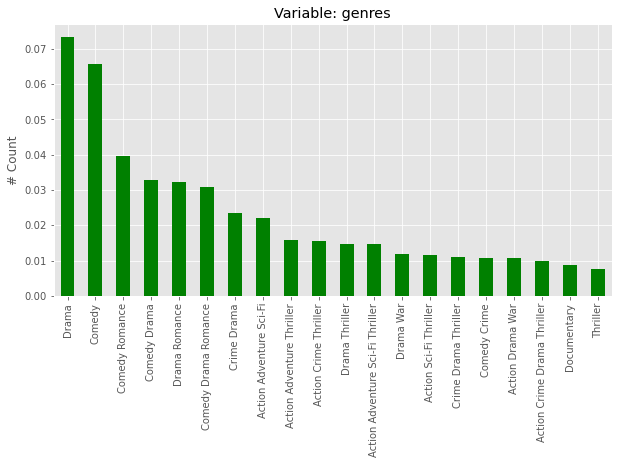

In [15]:
print(df1['genres'].value_counts()[0:20])
df1['genres'].value_counts(normalize=True)[0:20].plot(kind='bar', color='green', figsize=(10,5))
plt.title("Variable: genres")
plt.ylabel("# Count")
plt.show()

La mayoría de las películas son del género **Drama** y **Comedia**.

## Distribución de Frecuencias del rating

title
Small Roads (2011)                                             5.0
Divorce (1945)                                                 5.0
The Beautiful Story (1992)                                     5.0
Into the Middle of Nowhere (2010)                              5.0
The Sea That Thinks (2000)                                     5.0
The Wrecking Crew (2008)                                       5.0
Marihuana (1936)                                               5.0
No Distance Left to Run (2010)                                 5.0
Stargate SG-1 Children of the Gods - Final Cut (2009)          5.0
This Thing With Sarah (2013)                                   5.0
The great match (2007)                                         5.0
Schmatta: Rags to Riches to Rags (2009)                        5.0
Flight of the Conchords: A Texan Odyssey (2006)                5.0
Paying the Price: Killing the Children of Iraq (2000)          5.0
Little Criminals (1995)                                 

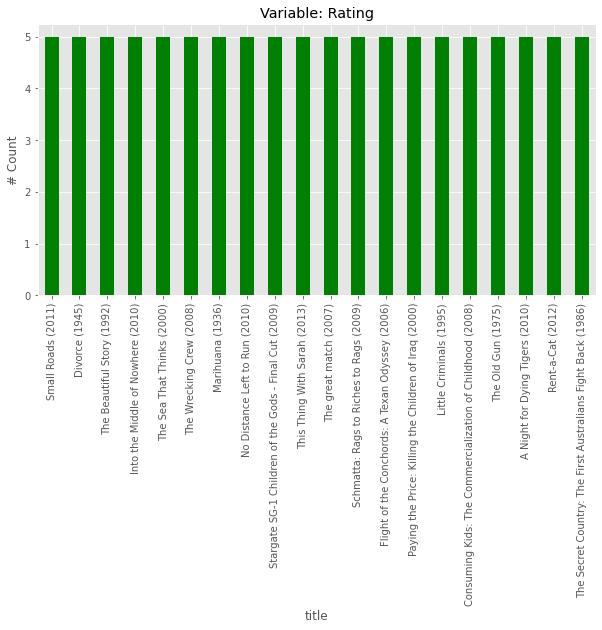

In [16]:
rating_avg = df1.groupby('title')['rating'].mean().sort_values(ascending=False)
print(rating_avg.head(20))

rating_avg[0:20].plot(kind='bar', color='green', figsize=(10,5))
plt.title("Variable: Rating")
plt.ylabel("# Count")
plt.show()

## Número de películas rankeadas por usuario

userId
118205    9254
8405      7515
82418     5646
121535    5520
125794    5491
Name: rating, dtype: int64


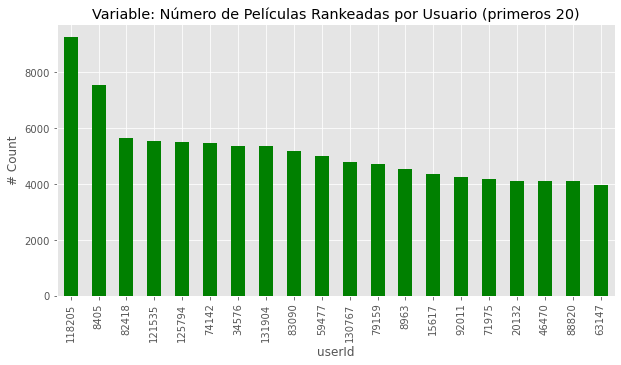

In [17]:
rated_movies_x_user = df1.groupby(by = "userId")["rating"].count().sort_values(ascending = False)
print(rated_movies_x_user.head())

rated_movies_x_user[0:20].plot(kind='bar', color='green', figsize=(10,5))
plt.title("Variable: Número de Películas Rankeadas por Usuario (primeros 20)")
plt.ylabel("# Count")
plt.xlabel('userId')
plt.show()

El usuario con el **Id 118205** fue el que rankeo más películas.

# Feature Engineering

In [18]:
df_final = df1[['movieId','title','genres','userId','rating','timestamp']]

Al dataset dinal se le podría aplicar una pivot_table o tabla de contigencia donde el índice o eje vertical son los usuarios y las columnas las películas, pero dado que son "bastantes" datos el IDE nos va a marcar un error debido a la capacidad de procesamiento del equipo.
Se podrían aplicar técnicas estadísticas para sacar una muestra representativa del dataset y así aplicar la pivot_table como se muestra a continuación:

In [19]:
# TABLA GENERAL QUE MARCA ERROR AL HACER PIVOT_TABLE: df_final.pivot_table(index='userId', columns=['title'], values='rating')
# MUESTRA:
split = int(len(df_final) * 0.2)
df_muestra = df_final[:split] 
df_user_ratings = df_muestra.pivot_table(index='userId', columns=['title'], values='rating')
df_user_ratings.head()

title,8 Seconds (1994),Above the Rim (1994),Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Across the Sea of Time (1995),Addams Family Values (1993),"Addiction, The (1995)","Adventures of Priscilla, Queen of the Desert, The (1994)","Age of Innocence, The (1993)","Air Up There, The (1994)",...,White Man's Burden (1995),White Squall (1996),Widows' Peak (1994),Wild Bill (1995),Wings of Courage (1995),With Honors (1994),Wolf (1994),"Wonderful, Horrible Life of Leni Riefenstahl, The (Macht der Bilder: Leni Riefenstahl, Die) (1993)",Wyatt Earp (1994),"Young Poisoner's Handbook, The (1995)"
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Ejemplo de recomendaciones de las películas'Jurassic Park (1993)','Batman (1989)','Addams Family Values (1993)'
# utilizando correlación y una muestra del dataset.
pelis = ['Batman (1989)','Addams Family Values (1993)','Jurassic Park (1993)']

for peli in pelis:
    rated_movie = df_user_ratings[peli]
    # Identificando corrrelaciones,
    similar_movies = df_user_ratings.corrwith(rated_movie)
    similar_movies.dropna(inplace=True)
    similar_movies = pd.DataFrame(similar_movies, columns=['correlacion'])
    print("RECOMENDACIONES EN FUNCIÓN DE LA CORRELACIÓN: ")
    print(similar_movies.sort_values(by='correlacion', ascending=False).head())
    print("\n")

RECOMENDACIONES EN FUNCIÓN DE LA CORRELACIÓN: 
                                         correlacion
title                                               
Batman (1989)                               1.000000
Girl in the Cadillac (1995)                 0.768273
New York Cop (Nyû Yôku no koppu) (1993)     0.490163
Homage (1995)                               0.473919
Desert Winds (1995)                         0.441261


RECOMENDACIONES EN FUNCIÓN DE LA CORRELACIÓN: 
                                     correlacion
title                                           
Addams Family Values (1993)             1.000000
Gospa (1995)                            0.946729
Girl in the Cadillac (1995)             0.742614
Headless Body in Topless Bar (1995)     0.577350
Nemesis 2: Nebula (1995)                0.542627


RECOMENDACIONES EN FUNCIÓN DE LA CORRELACIÓN: 
                                         correlacion
title                                               
Jurassic Park (1993)               

Al hacer uso de la muestra se observa que se pierden "bastantes" observaciones por lo que se procede a utilizar una técnica diferente de agregación. También se puede notar que aunque se tenga correlación alta puede que los usuarios no quieran ver esas películas dado que pudieron haber calificado otras películas.

### Agregaciones
Aplicar transfromaciones a los datos tales como agrupar por el id de la película y obtener su rating promedio con el fin de filtrar el volumen de ratings para que se consideren similares.

In [21]:
# Utilizando la agrupación en pandas se usan funciones agregadas count y mean y se ponen en columnas en el dataset.
# Así se calcula el número total de ratings y su media de cada película.
df_final['total_ratings'] = df_final.groupby('movieId')['rating'].transform('count')
df_final['mean_rating'] = df_final.groupby('movieId')['rating'].transform('mean')
df_final.head()

<ipython-input-21-50a156958649>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['total_ratings'] = df_final.groupby('movieId')['rating'].transform('count')
<ipython-input-21-50a156958649>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['mean_rating'] = df_final.groupby('movieId')['rating'].transform('mean')


,movieId,title,genres,userId,rating,timestamp,total_ratings,mean_rating
14162882,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,97809,3.0,2008-06-11 04:47:11,49695,3.92124
15347420,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,106140,5.0,2013-01-29 03:33:49,49695,3.92124
15347355,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,106138,3.0,2002-07-31 15:48:53,49695,3.92124
10170195,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,70354,4.5,2011-02-13 18:55:40,49695,3.92124
10170255,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,70355,3.5,2008-01-26 16:56:54,49695,3.92124


In [22]:
# Una vez agregados se remuven los duplicados y se seleccionana solamente los features:
# 'movieId', 'title', 'total_ratings', 'mean_rating'
df_final = df_final[['movieId', 'title', 'total_ratings', 'mean_rating']]
df_final.drop_duplicates('movieId', keep='first', inplace=True)
df_final.head()

,movieId,title,total_ratings,mean_rating
14162882,1,Toy Story (1995),49695,3.921240
14103187,2,Jumanji (1995),22243,3.211977
17241746,3,Grumpier Old Men (1995),12735,3.151040
15126002,4,Waiting to Exhale (1995),2756,2.861393
3218667,5,Father of the Bride Part II (1995),12161,3.064592


In [23]:
# Dependiendo del Científico de Datos se puede tomar un umbral de las películas que tengn más de "m" calificaciones, por ejemplo
# m=100 calificaciones ya que haría los datos más consistentes
m = 100
populares_movies = df_final['total_ratings'] >= m
populares_movies = df_final[populares_movies].sort_values(['total_ratings', 'mean_rating'], ascending=False)
populares_movies.head()

,movieId,title,total_ratings,mean_rating
18953612,296,Pulp Fiction (1994),67310,4.174231
11598764,356,Forrest Gump (1994),66172,4.029000
17995495,318,"Shawshank Redemption, The (1994)",63366,4.446990
13147363,593,"Silence of the Lambs, The (1991)",63299,4.177057
4658412,480,Jurassic Park (1993),59715,3.664741


In [24]:
# Se ordena de manera ascendente para observar que al menos hay 100 calificaciones
populares_movies.sort_values(by='total_ratings', ascending=True).head()

,movieId,title,total_ratings,mean_rating
17108947,56336,Wrong Turn 2: Dead End (2007),100,2.325
14007184,51127,loudQUIETloud: A Film About the Pixies (2006),100,3.770
4276007,30867,Kamikaze Girls (Shimotsuma monogatari) (2004),100,3.765
4586676,8201,At Play in the Fields of the Lord (1991),100,3.415
14112891,80469,Superman/Batman: Apocalypse (2010),100,3.350


Se podría hacer un merge del dataset **populares_movies** que contiene las calificaciones medias de las películas 
donde más de 100 personas votaron el de **similar_movies**, así se obtiene un mejor dataset. 
Si luego se eliminan los valores nulos de todas las películas que no tienen calificaciones y se ponen en orde descendente por correlación, se obtiene una lista de películas que también fueron calificadas por personas que vieron la película objetivo.
Eso nos daría recomendación donde **"las personas que vieron esto también vieron"**.

In [25]:
# Merge de similar_movies con df_popular_movies
similar_movies = similar_movies.reset_index()
popular_similar_movies = similar_movies.merge(populares_movies, on='title', how='left')
popular_similar_movies = popular_similar_movies.dropna()
popular_similar_movies.sort_values(by='correlacion', ascending=False).head(10)

,title,correlacion,movieId,total_ratings,mean_rating
278,Jurassic Park (1993),1.000000,480.0,59715.0,3.664741
528,Three Wishes (1995),0.387373,201.0,365.0,3.027397
274,Jumanji (1995),0.380928,2.0,22243.0,3.211977
496,Speed (1994),0.379169,377.0,41562.0,3.493203
236,Home Alone (1990),0.376493,586.0,28348.0,3.086655
521,Terminator 2: Judgment Day (1991),0.371392,589.0,52244.0,3.931954
102,Cliffhanger (1993),0.359569,434.0,24940.0,3.057338
352,Mrs. Doubtfire (1993),0.357181,500.0,34392.0,3.386267
200,"Fugitive, The (1993)",0.347477,457.0,49581.0,3.985690
424,Race the Sun (1996),0.344080,120.0,147.0,2.880952


### Distribución de Variable Objetivo
Utilizando la hipótesise que cualquier puntaje superior a 4 es una buena indicación de una película.

Se crea una nueva columna con la condición:
* 1 in case the rating is >= 4 (flag for "high" rating)
* 0 in case the rating is < 4

In [26]:
popular_similar_movies['rating'] = popular_similar_movies['mean_rating'].apply(lambda x: 1 if x>=4 else 0)
popular_similar_movies['rating'].value_counts() 

0    525
1     20
Name: rating, dtype: int64

In [27]:
# Variable Objetivo en porcentaje del dataset df1
print('low_rating: ', round(popular_similar_movies['rating'].value_counts()[0]/len(popular_similar_movies) * 100,2), '% del dataset')
print('high_rating: ', round(popular_similar_movies['rating'].value_counts()[1]/len(popular_similar_movies) * 100,2), '% del dataset')
# Se tienen clases desbalanceadas

low_rating:  96.33 % del dataset
high_rating:  3.67 % del dataset


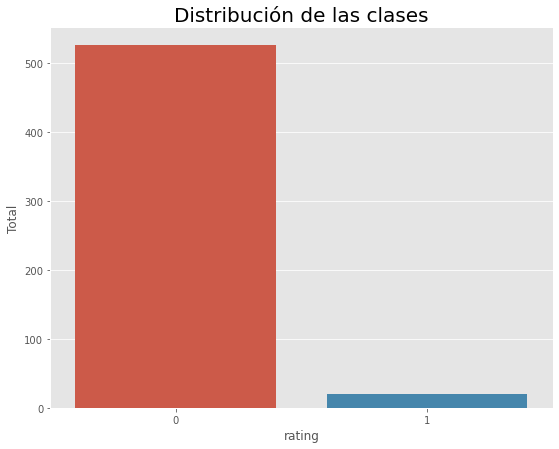

In [28]:
# Distribución de la variable objetivo
plt.figure(figsize=(9,7))
sns.countplot(x='rating', data=popular_similar_movies)
plt.title("Distribución de las clases", fontsize=20)
plt.ylabel("Total")
plt.show()

Se puede modificar esto para dar resultados de a las **"personas a las que les gustó esta película también les gustó"** filtrando contra la calificación media. Utilizando la hipótesis de que cualquier puntaje superior a 4 es una buena indicación de una película que a alguien realmente le gustó, al agregar este filtro adicional se obtiene un conjunto modificado de resultados con **mejores** películas, las demás películas se clasificaría como 0.

In [29]:
popular_similar_liked_movies = popular_similar_movies[popular_similar_movies['mean_rating'] >= 4]
popular_similar_liked_movies.sort_values(by='correlacion', ascending=False).head(10)

,title,correlacion,movieId,total_ratings,mean_rating,rating
499,Star Wars: Episode IV - A New Hope (1977),0.317182,260.0,54502.0,4.190672,1
71,Braveheart (1995),0.313557,110.0,53769.0,4.042534,1
187,Forrest Gump (1994),0.308853,356.0,66172.0,4.029000,1
459,Schindler's List (1993),0.228759,527.0,50054.0,4.310175,1
475,"Shawshank Redemption, The (1994)",0.203035,318.0,63366.0,4.446990,1
469,Seven (a.k.a. Se7en) (1995),0.140327,47.0,43249.0,4.053493,1
556,"Usual Suspects, The (1995)",0.118176,50.0,47006.0,4.334372,1
317,Léon: The Professional (a.k.a. The Professiona...,0.093822,293.0,25804.0,4.050574,1
57,Blade Runner (1982),0.069778,541.0,30526.0,4.133706,1
152,Eat Drink Man Woman (Yin shi nan nu) (1994),0.037665,232.0,6150.0,4.035610,1


# Conclusiones

En el presente challenge se realizó un análisis de datasets relacionados con la evaluación de películas por parte de usuarios.
Dado que los datos vienen dispersos en varios archivos con extensión .csv lo que se hizo fue utilizar la librería de pandas para leerlos y hacer merge por Id's y así poder trabajar.

Se tiene un problema de aprendizaje supervisado de clasificaión donde la variable objetivo es binaria, es decir, si una película tiene un buen (4) o mal (0) ranking, así el objetivo es utilizar un algoritmo para clasificar películas.

Lo primero fue saber el tipo de dato, la cardinalidad de los conjuntos de datos donde se revisa si hay datos faltantes, seguido de hacer análisis exploratorio para tener una idea de las distribuciones de las distintas variables involucradas.

El primer reto fue manipular el dataset dado que su cardinalidad es "grande" para una computadora promedio, ya que se tiene un costo computacional alto, la idea principamente fue hacer una tabla de contignecia para sacar correlaciones pero al hacerlo debido al tamño del dataset el IDE marca error, entonces se tomó una muestra para generar la tabla de contigencia en donde el índice son los usuarios y las columnas son las películas y los registros son los rankings dados.
Al hacer surge una cuestión de que aunque se tenga correlación alta puede que los usuarios no quieran ver esas películas dado que pudieron haber calificado otras películas. Dicho problema de mejorar haciendo una agregación del dataset y filtrando por un umbral de las películas más rankeadas y ahora sí utilizar la correlación y así obtener un mejor algoritmo.

Para un trabajo posterior se podrían generar u obtener nuevos features para aplicar algún algoritmo de clasificaición desde una regresión logística hasta una red neuronal y utilizar algoritmos como por ejemplo SelectKBest para obtener una escala de la importancia de las variables y agregar las más relevantes al modelo.

In [34]:
from IPython.display import Image
Image(url= "https://foreverpieces.com/wp-content/uploads/2020/05/Best-movies.jpg")